In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as op

## Autonomous Bounded Noise

We consider the following stochastic system on $\mathbb{R}\times S^1$
\begin{align*}
\frac{dx}{dt} &= -x(x-1)(x+1) + \sigma\sin(y_t) \\
dy_t &= \alpha dB_t
\end{align*}
so that the second component is Brownian motion on the circle.

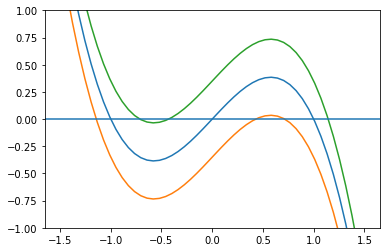

In [209]:
def F(x):
    return -x*(x-1)*(x+1)

x = np.linspace(-1.5, 1.5)
sig = 0.35

def Fp(x):
    return F(x) + sig

def Fm(x):
    return F(x) - sig

plt.plot(x, F(x))
plt.plot(x, F(x)-sig); plt.plot(x, F(x)+sig)
plt.ylim([-1,1]); plt.axhline(y=0, linestyle="-")

In [210]:
N = 10000
dt = 0.01
T = int(N*dt)/2
time = np.linspace(-T,T,N)
K = 5000
y = np.zeros((N,K))
x1 = np.zeros((N,K)); x1[0,:] = np.random.uniform(-1.5,-0.5, size=K)
x2 = np.zeros((N,K)); x2[0,:] = np.random.uniform(0.5, 1.5, size=K)

for i in range(N-1):
    t = time[i]
    dB = np.random.normal(size=K)*dt**.5
    x1[i+1,:] = x1[i,:] + dt*F(x1[i,:]) + dt*sig*np.sin(y[i,:])
    x2[i+1,:] = x2[i,:] + dt*F(x2[i,:]) + dt*sig*np.sin(y[i,:])
    y[i+1,:] = np.mod(y[i,:] + 3*dB, 2*np.pi) 

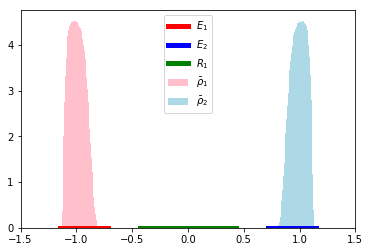

In [250]:
z1 = op.fsolve(Fm, -1.5); z2 = op.fsolve(Fp, -1.5);
z3 = op.fsolve(Fm,  1.5); z4 = op.fsolve(Fp,  1.5); 
z5 = op.fsolve(Fp, 0); z6 = op.fsolve(Fm, 0);

x_data1 = np.ndarray.flatten(x1[1000:,:]); x_data2 = np.ndarray.flatten(x2[1000:,:])
plt.figure(figsize=(6,4))
plt.hist(x_data1, bins = 50, density = True, histtype = 'stepfilled',
         color='pink', label='$\\bar{\\rho}_1$'); plt.xlim([-1.5,1.5])
plt.hist(x_data2, bins = 50, density = True, histtype = 'stepfilled',
         color='lightblue', label='$\\bar{\\rho}_2$'); plt.xlim([-1.5,1.5])
plt.plot([z1,z2],[0,0], linewidth = 5, color = 'red', label='$E_1$')
plt.plot([z3,z4],[0,0], linewidth = 5, color = 'blue', label='$E_2$')
plt.plot([z5,z6],[0,0], linewidth = 5, color = 'green', label='$R_1$')
plt.legend(loc='upper center')

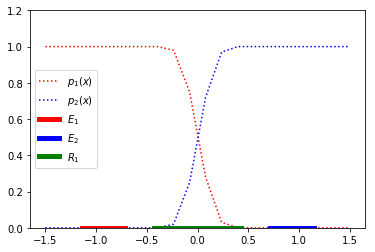

In [256]:
N = 10000
dt = 0.01
T = int(N*dt)/2
time = np.linspace(-T,T,N)
K = 2000
y = np.zeros((N,K))
x = np.zeros((N,K)); x[0,:] = np.linspace(-1.5,1.5,K)

for i in range(N-1):
    t = time[i]
    dB = np.random.normal(size=K)*dt**.5
    x[i+1,:] = x[i,:] + dt*F(x[i,:]) + dt*sig*np.sin(y[i,:])
    y[i+1,:] = np.mod(y[i,:] + 3*dB, 2*np.pi) 
    
z1 = op.fsolve(Fm, -1.5); z2 = op.fsolve(Fp, -1.5);
z3 = op.fsolve(Fm,  1.5); z4 = op.fsolve(Fp,  1.5); 
z5 = op.fsolve(Fp, 0); z6 = op.fsolve(Fm, 0);

P = np.zeros(K)
for k in range(K):
    if z1 < x[-1,k] < z2:
        P[k] = 1
    elif z3 < x[-1,k] < z4:
        P[k] = 2
        
L = 100;
K_L = int(K/L)
p1 = np.zeros(K_L); p2 = np.zeros(K_L)
for j in range(K_L):
    P1 = P[L*j: L*(j+1)]
    p1[j] = np.sum(P1==1)/L
    p2[j] = np.sum(P1==2)/L

X = np.linspace(-1.5, 1.5, K_L)
plt.figure(figsize=(6,4))
plt.plot(X, p1, color='red', linestyle = ':', label='$p_1(x)$');
plt.plot(X, p2, color='blue', linestyle = ':', label='$p_2(x)$');
plt.plot([z1,z2],[0,0], linewidth = 5, color = 'red', label='$E_1$')
plt.plot([z3,z4],[0,0], linewidth = 5, color = 'blue', label='$E_2$')
plt.plot([z5,z6],[0,0], linewidth = 5, color = 'green', label='$R_1$')
plt.ylim([0,1.2])
plt.legend(loc='center left')

## Parameter Shift Bounded Noise

We consider the following stochastic system on $\mathbb{R}\times S^1$
\begin{align*}
\frac{dx}{dt} &= -(x-\lambda(rt))(x-\lambda(rt)-1)(x-\lambda(rt)+1) + \sigma\sin(y_t) \\
dy_t &= \alpha dB_t
\end{align*}

In [147]:
def prob_tip(r, sig):
    N = 5000
    dt = 0.01
    T = int(N*dt)/2
    time = np.linspace(-T,T,N)
    K = 10000
    y = np.zeros((N,K))
    sig = sig

    def F(x):
        return -x*(x-1)*(x+1)

    def l2(t):
        return 2*np.tanh(t)
    
    def l(t):
        if -1<t<1:
            return 5*np.exp(-1/(1-t**2))
        else:
            return 0
        
    x_eq = l(time[0])
    x = np.zeros((N,K)); x[0,:] = np.random.uniform(-1.2,0-0.8, size=K)
    x_plus = np.zeros(N); x_plus[0] = x_eq
    x_minus = np.zeros(N); x_minus[0] = x_eq
    x1 = np.zeros(N); x1[0] = -1; 
    x2 = np.zeros(N); x2[0] = -3

    for i in range(N-1):
        t = time[i]
        dB = np.random.normal(size=K)*dt**.5
        x[i+1,:] = x[i,:] + dt*F(x[i,:]-l2(r*t)) + dt*sig*np.sin(y[i,:])
        y[i+1,:] = np.mod(y[i,:] + 2*dB, 2*np.pi)

    x_final = x[-1,:]
    prob =  np.size(x_final[x_final < l2(time[-1])])/K
    return prob
prob_tip(0.26,0)

1.0

Text(0,0.5,'$TP(r)$')

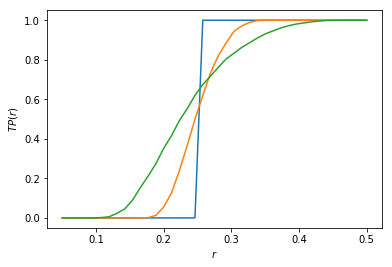

In [148]:
Kr = 40; Ksig = 3
r = np.linspace(0.05,0.5,Kr)
sig = np.linspace(0,0.3,Ksig)
tip_prob = np.zeros((Kr, Ksig))
for i in range(Kr):
    for j in range(Ksig):
        tip_prob[i,j] = prob_tip(r[i], sig[j])
plt.plot(r,tip_prob); plt.xlabel('$r$'); plt.ylabel('$TP(r)$')

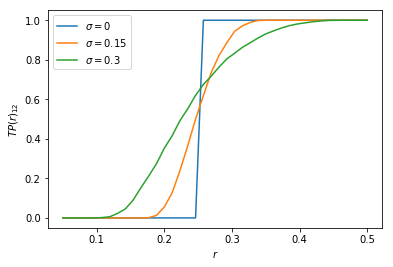

In [149]:
plt.plot(r,tip_prob[:,0], label='$\sigma=0$');
plt.plot(r,tip_prob[:,1], label='$\sigma=0.15$');
plt.plot(r,tip_prob[:,2], label='$\sigma=0.3$');
plt.xlabel('$r$'); plt.ylabel('$TP(r)_{12}$');
plt.legend()

# Conditional Tipping Probability  $r\mapsto \mathrm{TP}(r,\omega)$

In [124]:
def Y():
    y = np.zeros(N)
    for i in range(N-1):
        dB = np.random.normal(size=1)*dt**.5
        y[i+1] = np.mod(y[i] + 2*dB, 2*np.pi)
    return y
 
def prob_tip_y(r,sig,y):
    N = 5000
    dt = 0.01
    T = int(N*dt)/2
    time = np.linspace(-T,T,N)
    K = 1000
    sig = sig

    def F(x):
        return -x*(x-1)*(x+1)

    def l2(t):
        return 2*np.tanh(t)
    
    def l(t):
        if -1<t<1:
            return 5*np.exp(-1/(1-t**2))
        else:
            return 0
        
    x_eq = l(time[0])
    x = np.zeros((N,K)); x[0,:] = np.random.uniform(-1.2,0-0.8, size=K)

    for i in range(N-1):
        t = time[i]
        Yi = np.tile(y[i], (K,1))
        x[i+1,:] = x[i,:] + dt*F(x[i,:]-l2(r*t)) + dt*sig*np.sin(y[i])

    x_final = x[-1,:]
    prob =  np.size(x_final[x_final < l2(time[-1])])/K
    return prob

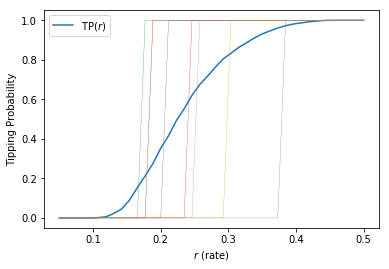

In [154]:
Kr = 40; Ky = 8
r = np.linspace(0.05,0.5,Kr)
sig = 0.3
tip_prob_y = np.zeros((Ky, Kr))
for i in range(Ky):
    y = Y()
    for j in range(Kr):
        tip_prob_y[i,j] = prob_tip_y(r[j], sig, y)
plt.plot(r,tip_prob[:,2], label='$\mathrm{TP}(r)$');
plt.plot(r,tip_prob_y.T, linewidth=0.3); plt.xlabel('$r$ (rate)'); plt.ylabel('Tipping Probability')
plt.legend()

In [137]:
np.shape(tip_prob_y)

(40, 2)

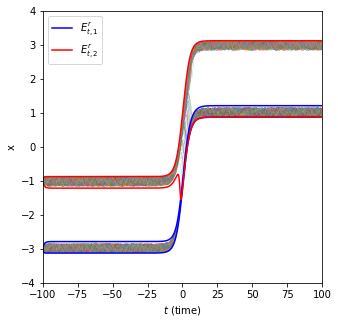

In [19]:
r = .2
N = 20000
dt = 0.01
T = int(N*dt)/2
time = np.linspace(-T,T,N)
K = 100
y1 = np.zeros((N,K)); y2 = np.zeros((N,K))
sig = 0.3

def F(x):
    return -x*(x-1)*(x+1)

def l(t):
    return 2*np.tanh(t)
    
def l2(t):
    if -1<t<1:
        return 5*np.exp(-1/(1-t**2))
    else:
        return 0
        
x_eq1 = l(time[0])-1
x_eq2 = l(time[0])+1
x1 = np.zeros((N,K)); x1[0,:] = np.random.uniform(x_eq1-.1, x_eq1+.1, size=K)
x2 = np.zeros((N,K)); x2[0,:] = np.random.uniform(x_eq2-.1, x_eq2+.1, size=K)
x_plus_1 = np.zeros(N); x_plus_1[0] = x_eq1
x_minus_1 = np.zeros(N); x_minus_1[0] = x_eq1
x_plus_2 = np.zeros(N); x_plus_2[0] = x_eq2
x_minus_2 = np.zeros(N); x_minus_2[0] = x_eq2

for i in range(N-1):
    t = time[i]
    dB1 = np.random.normal(size=K)*dt**.5
    dB2 = np.random.normal(size=K)*dt**.5
    x_plus_1[i+1] = x_plus_1[i] +dt*(F(x_plus_1[i]-l(r*t)) + sig)
    x_minus_1[i+1] = x_minus_1[i] +dt*(F(x_minus_1[i]-l(r*t)) - sig)
    x_plus_2[i+1] = x_plus_2[i] +dt*(F(x_plus_2[i]-l(r*t)) + sig)
    x_minus_2[i+1] = x_minus_2[i] +dt*(F(x_minus_2[i]-l(r*t)) - sig)
    x1[i+1,:] = x1[i,:] + dt*F(x1[i,:]-l(r*t)) + dt*sig*np.sin(y1[i,:])
    x2[i+1,:] = x2[i,:] + dt*F(x2[i,:]-l(r*t)) + dt*sig*np.sin(y2[i,:])
    y1[i+1,:] = np.mod(y1[i,:] + 2*dB1, 2*np.pi)
    y2[i+1,:] = np.mod(y2[i,:] + 2*dB1, 2*np.pi)

plt.figure(figsize=(5,5))
plt.plot(time, x1, linewidth=0.2)
plt.plot(time, x2, linewidth=0.2)
plt.plot(time, x_minus_1, color='blue'); plt.plot(time, x_plus_1, color='blue', label='$E_{t,1}^r$'); 
plt.plot(time, x_minus_2, color='red'); plt.plot(time, x_plus_2, color='red', label='$E_{t,2}^r$' ); 
plt.xlabel("$t$ (time)")
plt.ylabel("x")
plt.legend()

plt.ylim([-4,4]); plt.xlim([-T,T])
x_final_1 = x1[-1,:]
x_final_2 = x2[-1,:]
prob1 = np.size(x_final_1[x_final_1 > 0])/K
prob2 = np.size(x_final_2[x_final_2 < 0])/K

(-25.0, 25.0)

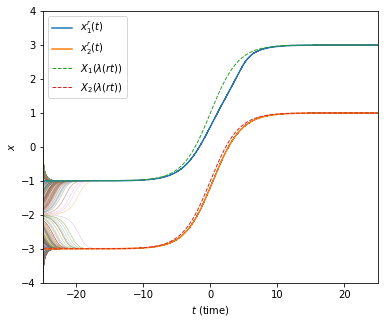

In [140]:
r=0.24; sig=0.3
N = 5000
dt = 0.01
T = int(N*dt)/2
time = np.linspace(-T,T,N)
K = 500
y = np.zeros((N,K))
sig = 0

def F(x):
    return -x*(x-1)*(x+1)

def l(t):
    return 2*np.tanh(t)
    
def l2(t):
    if -1<t<1:
        return 8*np.exp(-1/(1-t**2))
    else:
        return 0
        
x_eq = l(time[0])
x = np.zeros((N,K)); x[0,:] = np.random.uniform(l(time[0])-2,l(time[0])+2, size=K)
x1 = np.zeros(N); x1[0] = -1; 
x2 = np.zeros(N); x2[0] = -3
X1 = np.zeros(N); X1[0] = l(r*time[0])+1
X2 = np.zeros(N); X2[0] = l(r*time[0])-1

for i in range(N-1):
    t = time[i]
    x[i+1,:] = x[i,:] + dt*F(x[i,:]-l(r*t))
    x1[i+1] = x1[i] + dt*F(x1[i]-l(r*t))
    x2[i+1] = x2[i] + dt*F(x2[i]-l(r*t))
    X1[i+1] = l(r*time[i])+1; X2[i+1] = l(r*time[i])-1
    
plt.figure(figsize=(6,5))
plt.plot(time, x, linewidth=0.2)
plt.plot(time, x1, label="$x_1^r(t)$")
plt.plot(time, x2, label="$x_2^r(t)$")
plt.plot(time, X1, label="$X_1(\lambda(rt))$", linewidth=1, linestyle="--")
plt.plot(time, X2, label="$X_2(\lambda(rt))$", linewidth=1, linestyle='--')


plt.xlabel("$t$ (time)")
plt.ylabel("$x$")
plt.legend()

plt.ylim([-4,4]); plt.xlim([-T,T])

# Oscillatory Example
Cosnider the system in polar co-ordinates given by
\begin{align}
&\dot{r} = r(1-r)(2-r)(3-r)  \\
&\dot{\theta} = 1+br^2 
\end{align}
We can convert this to Cartesian co-ordinates 
\begin{align}
\dot{x} = x(1-r)(2-r)(3-r) - y(1+br^2) \\
\dot{y} = y(1-r)(2-r)(3-r) + x(1+br^2)
\end{align}

In [311]:
# Define the deterministic vector field 
def f(Z):
    x = Z[0]; y = Z[1]
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    f1 = x*(1-r)*(1.5-r) - y*(1+r2) 
    f2 = y*(1-r)*(1.5-r) + x*(1+r2) 
    return np.array([f1,f2])

Now suppose we add bounded additive noise to the Cartesian system
\begin{align}
&\dot{x} = x(1-r)(2-r)(3-r) - y(1+br^2)  + \sigma \sin(W_t^1) \\
&\dot{y} = y(1-r)(2-r)(3-r) + x(1+br^2) + \sigma \sin(W_t^2)
\end{align}
There is an annular minimal invariant set whose boundary consits of trajectories driven by periodic noise realisations. This minimal invariant set must support a stationary measure. We can simulate the system to obtain an approximation. 

In [ ]:
N = 2000; K = 100000; dt = 0.01
Z = np.zeros((N,2,K)); Z[0,0,:] = np.random.uniform(-1,1,size=K); Z[0,1,:] = np.random.uniform(-1,1,size=K)
y = np.zeros((N,2,K)); y[0,0,:] = np.random.uniform(-1,1,size=K); y[0,1,:] = np.random.uniform(-1,1,size=K)
sig = 0.2

for i in range(N-1):
    y[i+1,:,:] = y[i,:,:] + np.sqrt(dt)*np.random.normal(size=(2,K))
    Z[i+1,:,:] = Z[i,:,:] + dt*f(Z[i,:,:]) + sig*dt*np.sin(y[i,:,:])

Z_final = Z[-1,:,:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in add
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in add
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in subtract
  


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:966: RuntimeWarning: invalid value encountered in less_equal
  if np.any(np.asarray(dedges[i]) <= 0):


ValueError: cannot convert float NaN to integer

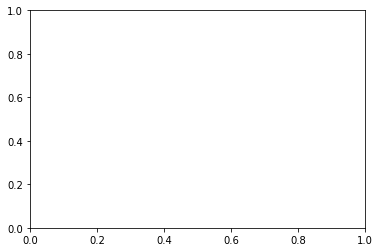

In [313]:
plt.hist2d(Z_final[0,:], Z_final[1,:], bins=100, normed=True);
plt.colorbar()

In [309]:
N = 2000; K = 100000; dt = 0.01
Z = np.zeros((N,2,K)); Z[0,0,:] = np.random.uniform(-1,1,size=K); Z[0,1,:] = np.random.uniform(-1,1,size=K)
y = np.zeros((N,2)); y[0,:] = np.random.uniform(-1,1,size=2); 
sig = 0.6

for i in range(N-1):
    y[i+1,:] = y[i,:] + np.sqrt(dt)*np.random.normal(size=2)
    Y = np.tile(y[i], (K,1)).T
    Z[i+1,:,:] = Z[i,:,:] + dt*f(Z[i,:,:]) + sig*dt*np.sin(Y)


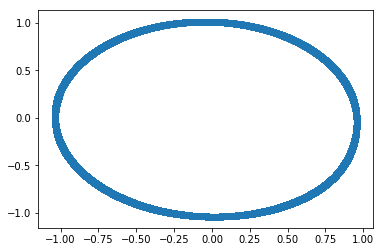

In [310]:
plt.scatter(Z[-1,0,:], Z[-1,1,:])

In [307]:
def prob_tip(r, sig):
    N = 5000
    dt = 0.01
    T = int(N*dt)/2
    time = np.linspace(-T,T,N)
    K = 10000
    y = np.zeros((N,K))
    sig = sig

    def F(x):
        return -x*(x-1)*(x+1)

    def l2(t):
        return 2*np.tanh(t)
    
    def l(t):
        if -1<t<1:
            return 5*np.exp(-1/(1-t**2))
        else:
            return 0
        
    x_eq = l(time[0])
    x = np.zeros((N,K)); x[0,:] = np.random.uniform(-1.5,0, size=K)
    x_plus = np.zeros(N); x_plus[0] = x_eq
    x_minus = np.zeros(N); x_minus[0] = x_eq
    x1 = np.zeros(N); x1[0] = -1; 
    x2 = np.zeros(N); x2[0] = -3

    for i in range(N-1):
        t = time[i]
        dB = np.random.normal(size=K)*dt**.5
        #x_plus[i+1] = x_plus[i] +dt*(F(x_plus[i], l(r*t)) + sig)
        #x_minus[i+1] = x_minus[i] +dt*(F(x_minus[i], l(r*t)) - sig)
        x[i+1,:] = x[i,:] + dt*F(x[i,:]-l(r*t)) + dt*sig*np.sin(y[i,:])
        y[i+1,:] = np.mod(y[i,:] + 2*dB, 2*np.pi)
        x1[i+1] = x1[i] + dt*F(x1[i]-l(r*t))
        x2[i+1] = x2[i] + dt*F(x2[i]-l(r*t))

    x_final = x[-1,:]
    prob = 1- np.size(x_final[x_final < l(time[-1])])/K
    return prob


(100000, 2)

array([0.  , 0.15, 0.3 ])